In [1]:
import cPickle
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
import csv
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

# change READABLE fonts that aren't ugly
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
matplotlib.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
matplotlib.rc('font', size=16)
matplotlib.rc('xtick.major', size=6, width=1)
matplotlib.rc('xtick.minor', size=3, width=1)
matplotlib.rc('ytick.major', size=6, width=1)
matplotlib.rc('ytick.minor', size=3, width=1)
matplotlib.rc('axes', linewidth=1)

# PPI topology

In [2]:
# Load PPI
fn = './PPI_July_2013.pcl'
with open(fn, 'r') as fp:
    PPI = cPickle.load(fp)

In [3]:
# Load the look up table for integer node labels in PPI
PPI_lut = {}
with open("./gene_info_stripped_human") as f:
    for line in f:
        (key, val) = line.split()
        PPI_lut[int(key)] = val

## Pleiotropy as a function of PPI topology
- GWAS data is used to infer the pleiotropy of genes

In [4]:
# Load GWAS
fn = './gwas.pcl'
with open(fn, 'r') as fp:
    GWAS = cPickle.load(fp)

In [5]:
# create GWAS gene->trait network
GWAS_gt = nx.Graph()
for n1,n2,d in GWAS.edges_iter(data=True):
    if d['edge_type']=='gene->trait':
        GWAS_gt.add_edge(n1,n2)

# create GWAS snp->gene network
GWAS_sg = nx.Graph()
for n1,n2,d in GWAS.edges_iter(data=True):
    if d['edge_type']=='snp->gene':
        GWAS_sg.add_edge(n1,n2)

In [6]:
# cc = nx.closeness_centrality(PPI)
# bc = nx.betweenness_centrality(PPI)
ec = nx.eigenvector_centrality(PPI)
clust = nx.clustering(PPI)

# Load bc
fn = './ppi_betweenness_centrality.pcl'
with open(fn, 'r') as fp:
    bc = cPickle.load(fp)
fn = './ppi_closeness_centrality.pcl'
with open(fn, 'r') as fp:
    cc = cPickle.load(fp)

In [7]:
#cPickle.dump(cc, open("ppi_closeness_centrality.pcl", "w"))
#cPickle.dump(cc, open("ppi_betweenness_centrality.pcl", "w"))

In [9]:
# get degree pleiotropy pairs
degs = []
pleis = []
bcs = []
ecs = []
ccs = []
clusts = []
SNPs = []
    
for n in PPI.nodes_iter():
    if PPI_lut.has_key(int(n)):
        if GWAS_gt.has_node(PPI_lut[int(n)]) and GWAS_sg.has_node(PPI_lut[int(n)]):
            ccs.append(cc[n])
            bcs.append(bc[n])
            ecs.append(ec[n])
            degs.append(PPI.degree(n))
            pleis.append(GWAS_gt.degree(PPI_lut[int(n)]))
            clusts.append(clust[n])
            SNPs.append(GWAS_sg.degree(PPI_lut[int(n)]))

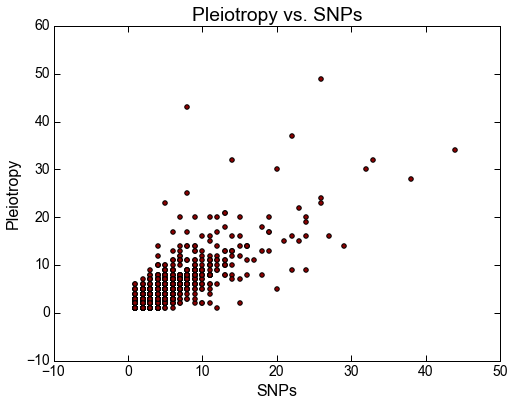

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(SNPs, pleis, c='darkred',marker='o',)
ax = plt.gca()
#ax.set_xscale('log')
plt.xlabel(r"SNPs", fontsize=16)
plt.ylabel(r"Pleiotropy", fontsize=16)
plt.title("Pleiotropy vs. SNPs")
plt.show()